# I. Classification

## 1. k-Nearest Neighbors

In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [6]:
# Apply kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
# scores = {}
scores_list_train = []
scores_list_test = []

for k in k_range:
    # Create classifier with K as the neighbour count
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit classifier to training data
    classifier.fit(x_train, y_train)
    
    # Test classifier against seen test data (training data)
    y_pred_train = classifier.predict(x_train)
    
    # Test classifier against un-seen test data (testing data)
    y_pred_test = classifier.predict(x_test)
    
    # Log results.
    # scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list_test.append(metrics.accuracy_score(y_test, y_pred_test))
    scores_list_train.append(metrics.accuracy_score(y_train, y_pred_train))

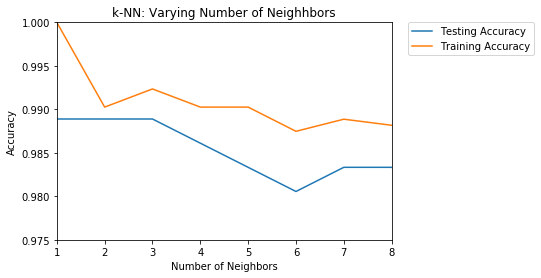

In [7]:
# Plot data.
plt.plot(k_range, scores_list_test, label="Testing Accuracy")
plt.plot(k_range, scores_list_train, label="Training Accuracy")

plt.title("k-NN: Varying Number of Neighhbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xlim(1, 8)
plt.ylim(0.975, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

These results indicate that a k-value of 1 produces highest accuracy for both sets of data, and a k-value of 3 produces the 2nd-highest accuracy.

## 2. Support Vector Machine

In [8]:
from sklearn import svm

svm_scores = {}

kernels = ["linear", "rbf", "poly"]

svm_accs = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(x_train, y_train)
    
    svm_y_pred = clf.predict(x_test)
    print("====> " + kernel + "-kernel results:")
    print(metrics.classification_report(y_test, svm_y_pred))
    svm_accs.append(metrics.accuracy_score(y_test, svm_y_pred))

====> linear-kernel results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.95      1.00      0.97        35
           2       0.97      1.00      0.99        36
           3       1.00      0.95      0.97        37
           4       1.00      0.97      0.98        32
           5       0.96      0.98      0.97        46
           6       1.00      0.97      0.98        30
           7       1.00      0.98      0.99        42
           8       1.00      0.95      0.97        38
           9       0.90      0.97      0.93        29

   micro avg       0.97      0.97      0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

====> rbf-kernel results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00

We can see that the polynomial and gamma kernels outperformed the linear kernel. Polynomial could be opted for as it has consistently accuracy, though a similar average to the gamma kernel.

## 3. Naive Bayes

Accuracy of using Naive Bayes method for classification: 0.8472222222222222


Text(33.0, 0.5, 'True label')

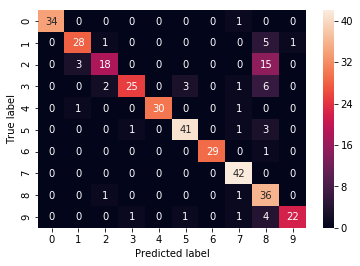

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

accuracy = (y_test.shape[0] - (y_test != y_pred).sum()) / y_test.shape[0]
print("Accuracy of using Naive Bayes method for classification: " + str(accuracy))

plt2 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt2.set_xlabel("Predicted label")
plt2.set_ylabel("True label")

Text(0.5, 1.0, 'Algorithm Comparison')

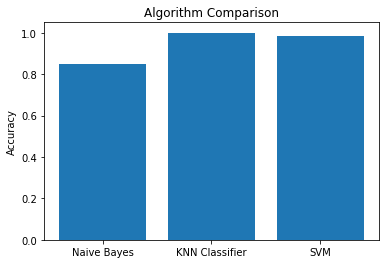

In [27]:
# Comparison of different classifiers in same plot:
# 1. k-NearestNeighbours with 1 neighbour
# 2. SVM with polynomial kernel
# 3. Naive Bayes

bayes_acc = accuracy
knn_best_acc = max(scores_list_train)
svm_acc = max(svm_accs)

plt.bar(["Naive Bayes", "KNN Classifier", "SVM"],[bayes_acc, knn_best_acc, svm_acc])
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison")

# II. Regression

## 1. Linear Regression

In [28]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [33]:
# Import data
gapminder = pd.read_csv('gapminder.csv')

# Clean up data
gapminder = gapminder.dropna()

gapminder_regions = gapminder["Region"]
gapminder = gapminder.drop(columns="Region")

gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2


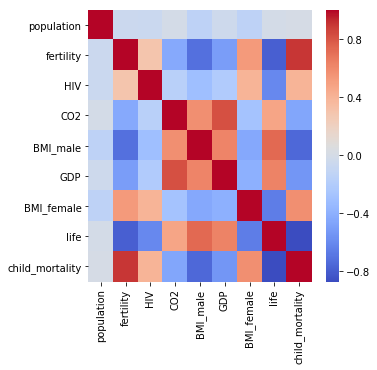

In [34]:
plt.figure(figsize = (5,5))

gapminder_corr = gapminder.corr()
sns.heatmap(data=gapminder_corr, 
            xticklabels=gapminder_corr.columns,
            yticklabels=gapminder_corr.columns,
            annot=False,
            cmap="coolwarm")

In [35]:
from sklearn import linear_model

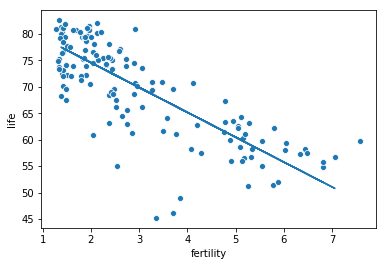

In [147]:
gm_x = gapminder["fertility"]
gm_y = gapminder["life"]
gm_x_train, gm_x_test, gm_y_train, gm_y_test = train_test_split(gm_x.values.reshape(-1, 1), 
                                                                gm_y.values.reshape(-1, 1), 
                                                                test_size = 0.2, 
                                                                random_state=51)

regr = linear_model.LinearRegression()
regr.fit(gm_x_train, gm_y_train)
gm_y_pred = regr.predict(gm_x_test)

sns.scatterplot(data=gapminder, x="fertility", y="life")
plt.plot(gm_x_test, gm_y_pred)


In [151]:
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso()
cross_val_score(lasso, gm_x, gm_y, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27 1.33 2.12 2.64 2.48 1.88
 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57 3.34 5.19 1.42 1.63 4.79
 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49 2.37 2.44 5.54 2.05 2.9
 1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61 4.07 3.06 2.58 3.26 1.33
 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28 1.31 1.43 7.06 2.54 1.42
 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48 4.88 1.8  2.04 2.15 6.34
 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 2. Logistic Regression

In [83]:
df = pd.read_csv('creditcard.csv')

In [84]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")

492 frauds,  284315 nonfrauds.


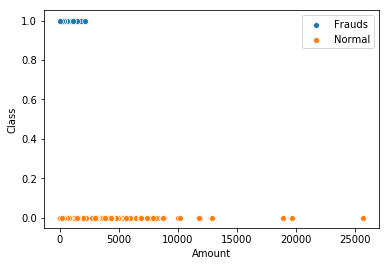

In [99]:
sns.scatterplot(data=frauds, x="Amount", y="Class", label="Frauds")
sns.scatterplot(data=non_frauds, x="Amount", y="Class", label="Normal")
plt.legend()
plt.show()

In [144]:
# Predicting with logistic regression

from sklearn.linear_model import LogisticRegression

cc_x = df["Amount"]
cc_y = df["Class"]

cc_x_train, cc_x_test, cc_y_train, cc_y_test = train_test_split(cc_x,
                                                                cc_y,
                                                                test_size = 0.35, 
                                                                random_state=52)

clf = LogisticRegression(random_state=0, 
                         solver='lbfgs',
                         multi_class='multinomial').fit(cc_x_train.values.reshape(-1,1), cc_y_train)

cc_y_pred = clf.predict(cc_x_test.values.reshape(-1,1))

Text(33.0, 0.5, 'True label')

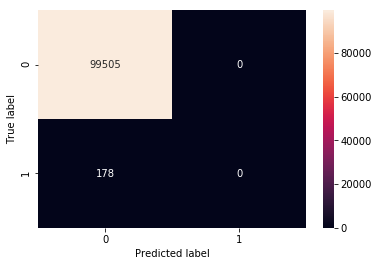

In [145]:
plt3 = sns.heatmap(confusion_matrix(cc_y_test, cc_y_pred), annot=True, fmt='g')
plt3.set_xlabel("Predicted label")
plt3.set_ylabel("True label")

In [146]:
metrics.accuracy_score(cc_y_test, cc_y_pred)

0.9982143394560757